In [49]:
import pandas as pd
from utils.usda import USDA
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
usda = USDA('IA','SOYBEANS')
regression = usda.linear_regression()

In [5]:
actual = regression[2]
predicted = regression[1]

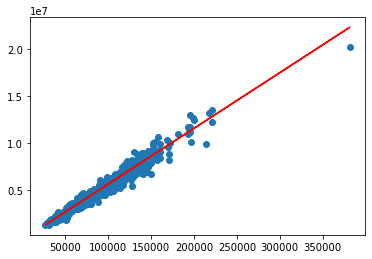

In [6]:
plt.scatter(actual['areaharvested'],actual['production'])
plt.plot(actual['areaharvested'],predicted,color='red')

## Decisioning Risk

In [41]:

features = usda.features()
#Client Tolerance Threshold
features['lossrisk'] = np.where(features['total_events']>=8,'high','low')
features.drop(columns=['countyname','state_name','crop','year','statenbr','statecd'],inplace=True)
features.dropna(inplace=True)

#Define Variables
y = features['lossrisk']
X = features.drop(columns='lossrisk')

In [42]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state=1,
                                                 stratify=y)


classifier = LogisticRegression(solver='lbfgs',random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#Train using the training data
classifier.fit(X_train,y_train)
print(f'Training Score{classifier.score(X_train,y_train)}')
print(f'Testing Score{classifier.score(X_test,y_test)}')

Training Score0.8725761772853186
Testing Score0.8925619834710744


In [53]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({'predictions':predictions,'Actual':y_test}).reset_index(drop=True)
report = classification_report(y_test,predictions)
print(report)

precision    recall  f1-score   support

        high       0.80      0.55      0.65        22
         low       0.91      0.97      0.94        99

    accuracy                           0.89       121
   macro avg       0.85      0.76      0.79       121
weighted avg       0.89      0.89      0.88       121

